# Exploring Credit Risk: An Analysis of Default Behavior in Credit Holders of Tiwan 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [3]:
# importing the dataset 
df = pd.read_csv("D:\\Project\\new_projects\\Credit_Risk_Prediction\\Dataset\\UCI_Credit_Card.csv")

In [4]:
#looking at the head of the dataset 
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


1. **ID**: Unique identifier for each credit card client.
2. **LIMIT_BAL**: Credit limit for each client.
3. **SEX**: Gender of the client. (1=male, 2=female)
4. **EDUCATION**: Level of education of the client.(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. **MARRIAGE**: Marital status of the client.(0= others, 1=married, 2=single, 3=Devorced)
6. **AGE**: Age of the client.(Age in years)
7. **PAY_0 to PAY_6**: Repayment status in the last 6 months in Descending order with a scale of (-2=no payment made, -1= pay due, 0=payed , 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. **BILL_AMT1 to BILL_AMT6**: Amount of Bill Statement in the last 6 months in Descending order with 6 Being April and 1 Being September also with a scale of  (Unit=  New Taiwan dollar)
9. **PAY_AMT1 to PAY_AMT6**: Amount of previous payment in the last 6 monthsin Descending order with 6 Being April and 1 Being September also with a scale of(Unit=  New Taiwan dollar)
10. **default.payment.next.month**: Indicates whether the client defaulted on the payment next month.

Each row in this DataFrame represents data for one credit card client, and there are 30,000 entries in total. The DataFrame contains both numerical and categorical data, with various columns representing different aspects of the credit card usage and payment behavior of the clients.

In [5]:
#getting the info of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

# Observations 
As we can see that in the head of the dataset there is a mistake in the column name 
in the place of **PAY_1** there is **PAY_0** insted where we need the first payment lets change that and also change the long difficult to read column name of the target variable **default.payment.next.month** to **Default** the next line of code does that.

In [6]:
# changing the column names 
df.columns = ['ID','LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
              'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
              'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default']
df.head(5)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


lets check for null value 

In [7]:
null_values_per_column = df.isnull().sum()
null_values_per_column
# we can conclude that there are no null values in any column.

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

# SEX 

In [8]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

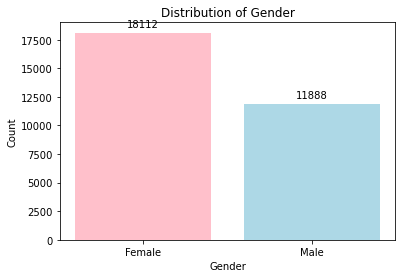

In [9]:
sex_counts = df['SEX'].value_counts()
plt.bar(['Female', 'Male'], sex_counts, color=['pink', 'Lightblue'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

for i, count in enumerate(sex_counts):
    plt.text(i, count + 500, str(count), ha='center')

plt.show()

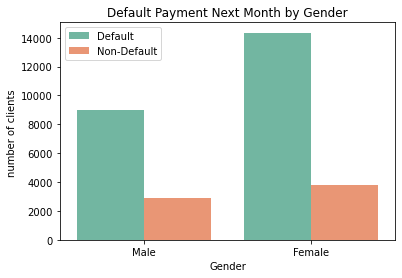

In [10]:
# Plot the count of default payment next month for each gender
sns.countplot(x='SEX', hue='Default', data=df, palette='Set2')
gender_labels = {1: 'Female', 2: 'Male'}

# Add custom labels for x-axis ticks
plt.xticks(ticks=[0, 1], labels=[gender_labels[2], gender_labels[1]])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('number of clients ')
plt.title('Default Payment Next Month by Gender')
plt.legend(labels=['Default', 'Non-Default'])
plt.show()


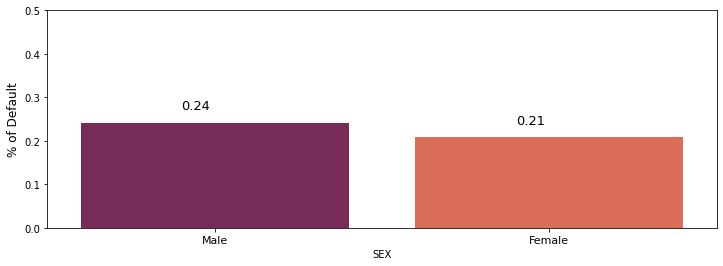

In [11]:
# plotting percent of default against maritial status of demopgraphic  

plt.figure(figsize=(12,4))
ax = sns.barplot(x = "SEX", y = "Default", data = df, palette = 'rocket', ci = None)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male','Female'], fontsize = 11)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

# observations : 
As we can se in general we have more men then women in or dataset resulting more men to be in default than female. 

# EDUCATION
exploring the Catogerial feature of Education 

In [12]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [13]:
df['Default'].groupby(df['EDUCATION']).value_counts(normalize = True)

EDUCATION  Default
0          0          1.000000
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.943089
           1          0.056911
5          0          0.935714
           1          0.064286
6          0          0.843137
           1          0.156863
Name: Default, dtype: float64

In [14]:
# As we can see that the three ie (0,5 and 6) catogeries are "unknown" combining them into one ie 5 for "Unknown" as a singal catogery 
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(0,5)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(6,5)

In [15]:
# Getting the count of education catogeries 
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

In [16]:
# checking the number of defaults throught the dataset 
df['Default'].value_counts()

0    23364
1     6636
Name: Default, dtype: int64

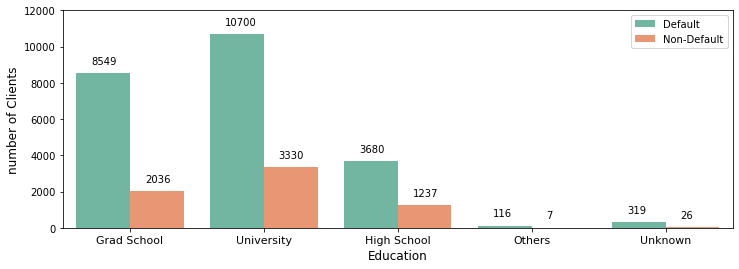

In [17]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data = df, x = 'EDUCATION', hue="Default", palette = 'Set2')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("number of Clients", fontsize= 12)
plt.legend(labels=['Default', 'Non-Default'])
plt.ylim(0,12000)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()

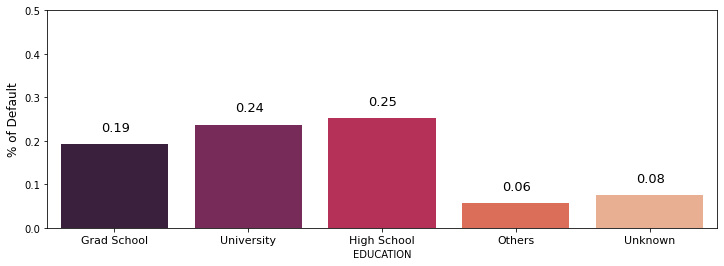

In [18]:
# plotting percent of default against maritial status of demopgraphic  

plt.figure(figsize=(12,4))
ax = sns.barplot(x = "EDUCATION", y = "Default", data = df, palette = 'rocket', ci = None)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

# observations : 
As we can see we have more number of defaulters in general over the dataset this graph shows us we have more number of Highschool graduates who are unable to pay back the loan hence falling into Default  

# MARRIAGE
Exploring the Catogerial feature of Marriage

In [19]:
# Getting the count of marriage catogeries 
df['MARRIAGE'].value_counts()

# In this catogery 1 is for married , 2 is for single and 3 is for Devorced while 0 is unknown 
# And since its a very small number amongst the whole dataset we can keep it as it is. 

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

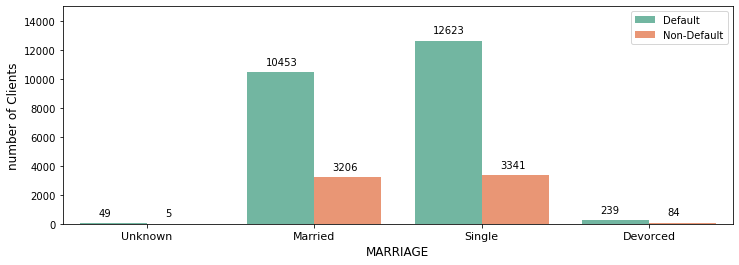

In [20]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'MARRIAGE', hue="Default", palette = 'Set2')

plt.xlabel("MARRIAGE", fontsize= 12)
plt.ylabel("number of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.legend(labels=['Default', 'Non-Default'])
plt.xticks([0,1,2,3,],['Unknown','Married','Single','Devorced'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()

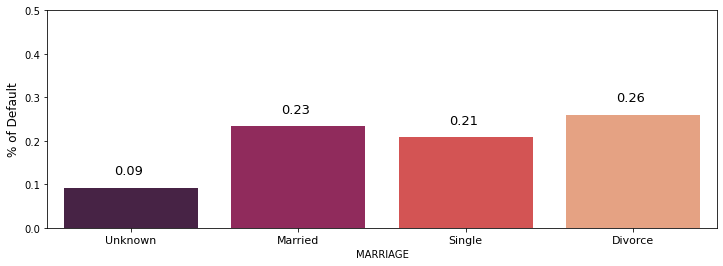

In [21]:
# plotting percent of default against maritial status of demopgraphic  

plt.figure(figsize=(12,4))
ax = sns.barplot(x = "MARRIAGE", y = "Default", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

# observations:
1. even though single and married Clients tend to take more loan the Devorced ones are the ones who tend to not repay the loan 

# AGE
Exploring the Catogerial feature of Age

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


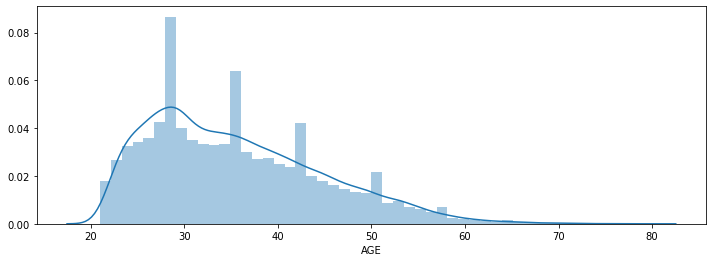

In [22]:
plt.figure(figsize=(12,4))
sns.distplot(df['AGE'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

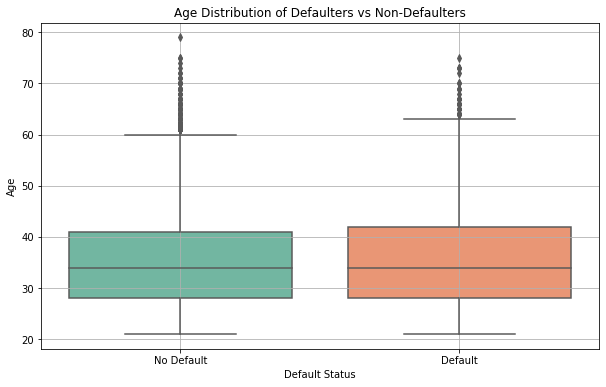

In [23]:
# Box Plot of Age of distribution and Default status 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Default', y='AGE', palette='Set2')
plt.title('Age Distribution of Defaulters vs Non-Defaulters')
plt.xlabel('Default Status')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.grid(True)
plt.show()

#as we can see majority of our population in the dataset is concentraged in between the age bracket of 30 to 40 years old 

In [24]:
df['AgeBin'] = pd.cut(df['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(df['AgeBin'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: AgeBin, dtype: int64


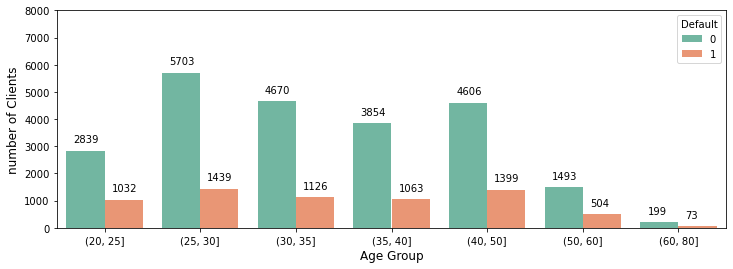

In [25]:
# Plotting  of clients against Age group 
plt.figure(figsize=(12,4))

df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = df, x = 'AgeBin', hue="Default", palette = 'Set2', order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("number of Clients", fontsize= 12)
plt.ylim(0,8000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

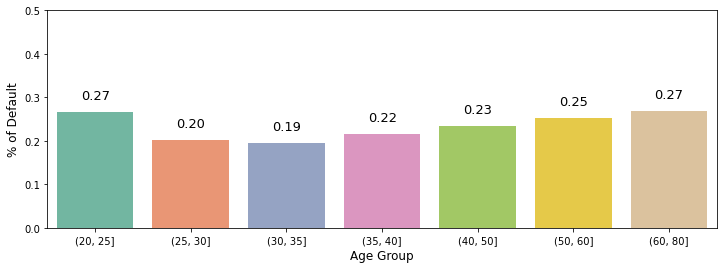

In [26]:
# plotting percent of Default against Age 

plt.figure(figsize=(12,4))
ax = sns.barplot(x = "AgeBin", y = "Default", data = df, palette = 'Set2', ci = None, order = AgeBin_order)
plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

# Observation: 
As we can see the demographic age between 40 to 35 has the lowest chances of falling into the defaulters 

# LIMIT_BAL
exploring the numerical feature of LIM_BAL ie limit of credit balance 

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


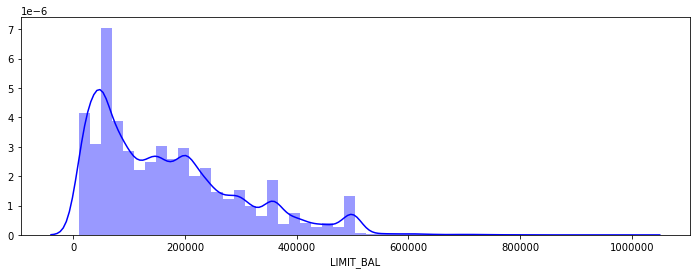

In [27]:
plt.figure(figsize=(12,4))
sns.distplot(df['LIMIT_BAL'],color='Blue')
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.show()

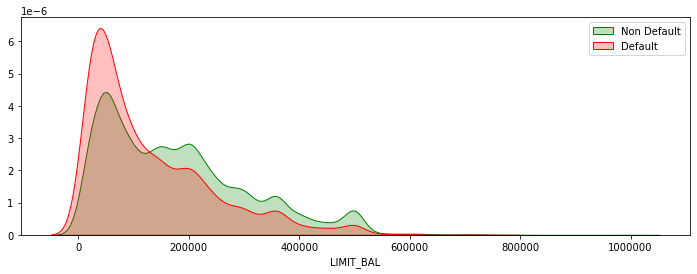

In [28]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['Default'] == 0), 'LIMIT_BAL'], label = 'Non Default', shade = True, color='Green')
sns.kdeplot(df.loc[(df['Default'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True, color='Red')
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.legend()
plt.show()

# Observation : 
As we can see from the last two plots that there are more numbers of Clinets who have a credit Balance of 200000 or less than that 

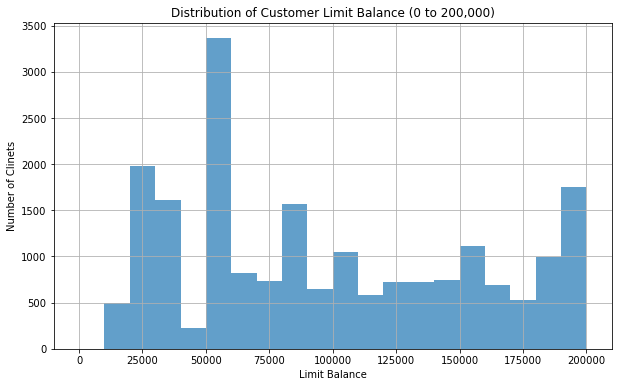

In [29]:
# To take a better look we can plot to see the exact distriibution of Clinets 
plt.figure(figsize=(10, 6))
plt.hist(df['LIMIT_BAL'], bins=20, range=(0, 200000), alpha=0.7)
plt.xlabel('Limit Balance')
plt.ylabel('Number of Clinets')
plt.title('Distribution of Customer Limit Balance (0 to 200,000)')
plt.grid(True)
plt.show()

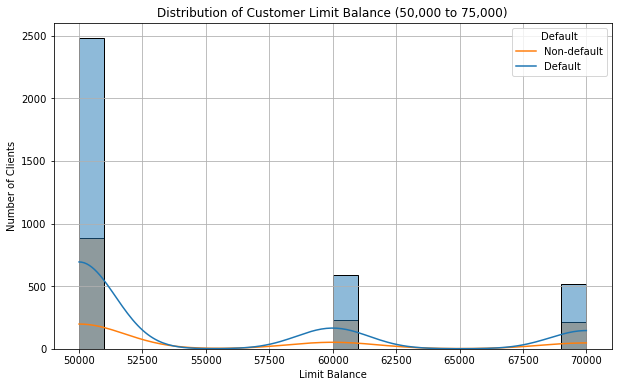

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[(df['LIMIT_BAL'] >= 50000) & (df['LIMIT_BAL'] <= 75000)], x='LIMIT_BAL', hue='Default', bins=20, kde=True)
plt.xlabel('Limit Balance')
plt.ylabel('Number of Clients')
plt.title('Distribution of Customer Limit Balance (50,000 to 75,000)')
plt.legend(title='Default', labels=['Non-default', 'Default'])
plt.grid(True)
plt.show()

# Observation: 
Around 750 coustomers were in default who have 50000 as a credit limit and around 250 Clients were Non defaulters

In [31]:
df['LimitBin'] = pd.cut(df['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(df['LimitBin'].value_counts())
df['Default'].groupby(df['LimitBin']).value_counts(normalize = True)

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: LimitBin, dtype: int64


LimitBin           Default
(5000, 50000]      0          0.682126
                   1          0.317874
(50000, 100000]    0          0.742016
                   1          0.257984
(100000, 150000]   0          0.788570
                   1          0.211430
(150000, 200000]   0          0.821518
                   1          0.178482
(200000, 300000]   0          0.839494
                   1          0.160506
(300000, 400000]   0          0.859369
                   1          0.140631
(400000, 500000]   0          0.878598
                   1          0.121402
(500000, 1100000]  0          0.888350
                   1          0.111650
Name: Default, dtype: float64

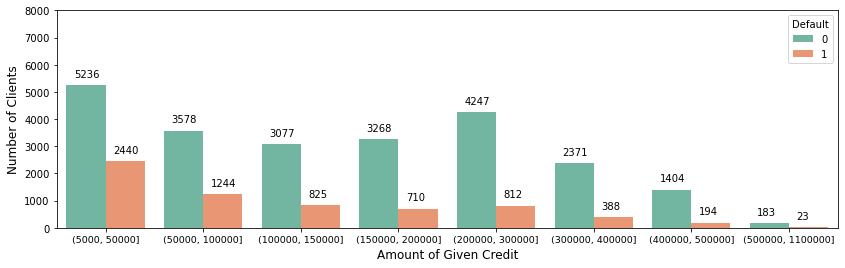

In [32]:
plt.figure(figsize=(14,4))

df['LimitBin'] = df['LimitBin'].astype('str')
LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.countplot(data = df, x = 'LimitBin', hue="Default", palette = 'Set2', order = LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,8000)
ax.tick_params(axis="x", labelsize= 9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

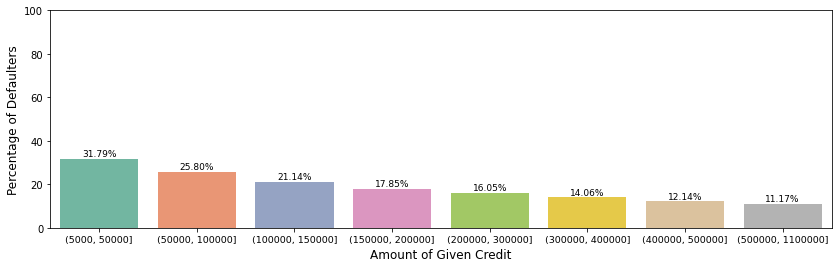

In [33]:
# plotting % of defaulters against the Amount of given Credit or Lim_balance 

plt.figure(figsize=(14, 4))

# Calculate the percentage of default for each bin
default_percent = df.groupby('LimitBin')['Default'].mean() * 100
default_percent = default_percent.reset_index()

# Create the bar plot
ax = sns.barplot(data=default_percent, x='LimitBin', y='Default', palette='Set2', order=LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize=12)
plt.ylabel("Percentage of Defaulters", fontsize=12)
plt.ylim(0, 100)
ax.tick_params(axis="x", labelsize=9.5)

# Annotate the bars with their percentage of defaulters
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


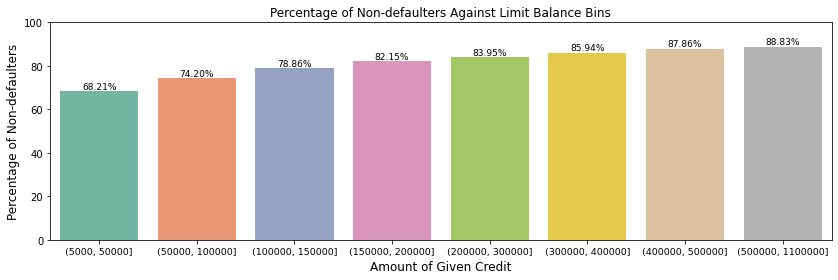

In [34]:
# plotting % of non defaulters against the Amount of given Credit or Lim_balance 

plt.figure(figsize=(14, 4))

# Calculate the percentage of non-default for each bin
non_default_percent = df[df['Default'] == 0].groupby('LimitBin').size() / df.groupby('LimitBin').size() * 100
non_default_percent = non_default_percent.reset_index(name='Percentage of Non-defaulters')

# Create the bar plot
ax = sns.barplot(data=non_default_percent, x='LimitBin', y='Percentage of Non-defaulters', palette='Set2', order=LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize=12)
plt.ylabel("Percentage of Non-defaulters", fontsize=12)
plt.ylim(0, 100)
ax.tick_params(axis="x", labelsize=9.5)

# Annotate the bars with their percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Percentage of Non-defaulters Against Limit Balance Bins')
plt.show()


# Observation : 
We can observe that the more the amount the less the number  of Defaulters that means the the more the credit limit the less the individual tends to not repay the loan 

# Age in relation with and Credit Limit/balance  
## lets compare and analyse features like Age , Education and Relationship Status of Clients with Credit Limit Balance 

#### Identintifying the Intracices of these features and their relationships, finding the Maximum range of Age bracket which have the highest loans amount given that is the credit limit balance 

In [35]:
average_limbal_age=df.groupby('AgeBin')['LIMIT_BAL'].mean() 
average_limbal_age

AgeBin
(20, 25]     73763.885301
(25, 30]    164320.918510
(30, 35]    197688.060732
(35, 40]    196780.557250
(40, 50]    179680.213156
(50, 60]    159349.023535
(60, 80]    201617.647059
Name: LIMIT_BAL, dtype: float64

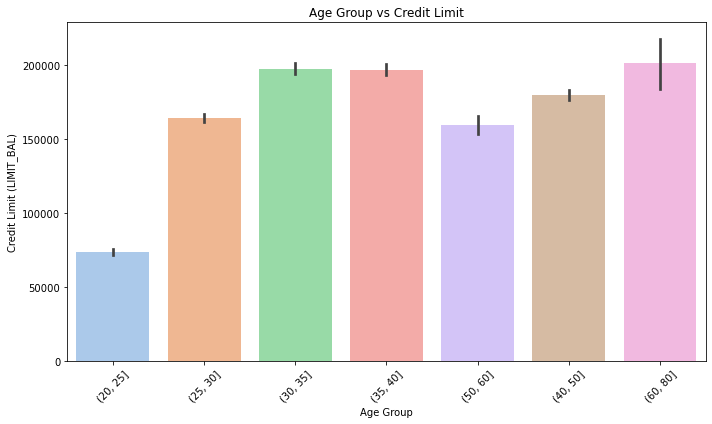

In [36]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeBin', y='LIMIT_BAL', data=df, palette='pastel')
plt.xlabel('Age Group')
plt.ylabel('Credit Limit (LIMIT_BAL)')
plt.title('Age Group vs Credit Limit')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

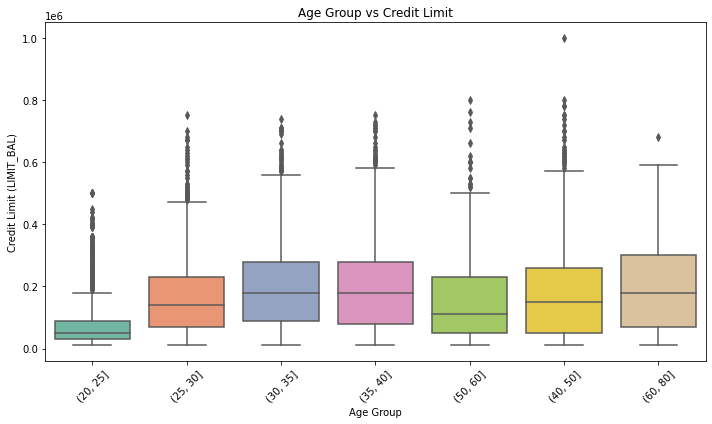

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeBin', y='LIMIT_BAL', data=df, palette='Set2')
plt.xlabel('Age Group')
plt.ylabel('Credit Limit (LIMIT_BAL)')
plt.title('Age Group vs Credit Limit')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Observations
1. Over all in general from the two plots we can say that  the age bracket of 60-80 are the individuals getting the maximum credit amount  

#### Identintifying the Intracices of these features and their relationships, finding what level of educational backghround has the highest loans amount given that is the credit limit balance. 

In [38]:
# Find the education level with the highest median credit score
education_credit_median = df.groupby('EDUCATION')['LIMIT_BAL'].max()
max_credit_education = education_credit_median.idxmax()
print("Education level with the highest mean credit score:", max_credit_education)
print(education_credit_median)

Education level with the highest mean credit score: 1
EDUCATION
1    1000000.0
2     800000.0
3     760000.0
4     710000.0
5     550000.0
Name: LIMIT_BAL, dtype: float64


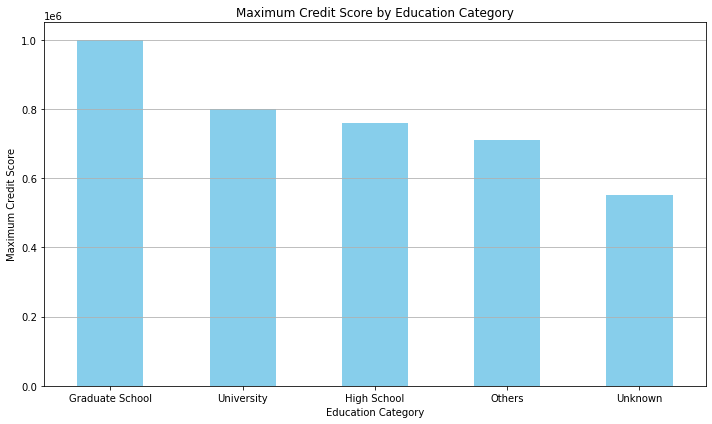

In [39]:

bins = [1, 2, 3, 4, 5,6]  
labels = ['Graduate School', 'University', 'High School', 'Others', 'Unknown']
df['EDUCATION_CATEGORY'] = pd.cut(df['EDUCATION'], bins=bins, labels=labels, right=False)
education_credit_max = df.groupby('EDUCATION_CATEGORY')['LIMIT_BAL'].max()

# Plotting
plt.figure(figsize=(10, 6))
education_credit_max.plot(kind='bar', color='skyblue')
plt.title('Maximum Credit Score by Education Category')
plt.xlabel('Education Category')
plt.ylabel('Maximum Credit Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 720x432 with 0 Axes>

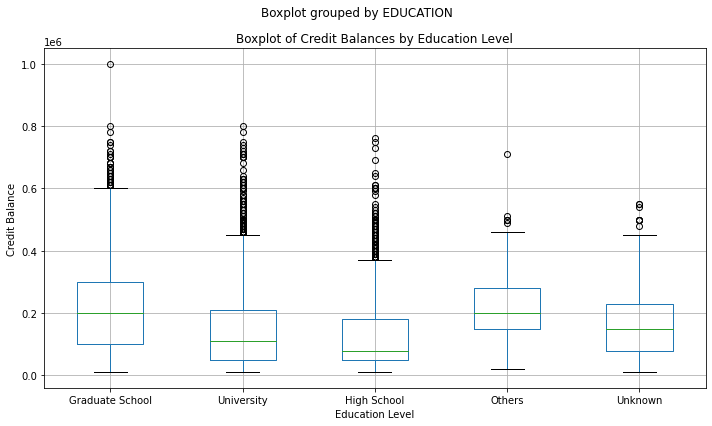

In [40]:
# Plotting boxplots for each education level
mean_credit_by_education = df.groupby('EDUCATION')['LIMIT_BAL']
plt.figure(figsize=(10, 6))
df.boxplot(column='LIMIT_BAL', by='EDUCATION', figsize=(10, 6))
plt.title('Boxplot of Credit Balances by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Credit Balance')
plt.xticks(range(1, 6), ['Graduate School', 'University', 'High School', 'Others', 'Unknown'])
plt.tight_layout()
# Show plot
plt.show()


# Observations
by looking at the graphs identify from the box plot and the bar plot that Graduate School level Clients in terms of education have the highest Credit balance 

#### Identintifying the Intracices of these features and their relationships, finding what Relationship Status has the highest loans amount given that is the credit limit balance. 

In [41]:
# Find the education level with the highest median credit score
marriage = df.groupby('MARRIAGE')['LIMIT_BAL'].mean()
max_credit_score = marriage.idxmax()
print("this Relationship Status with the highest mean credit score:", max_credit_score)
print(max_credit_score)

this Relationship Status with the highest mean credit score: 1
1


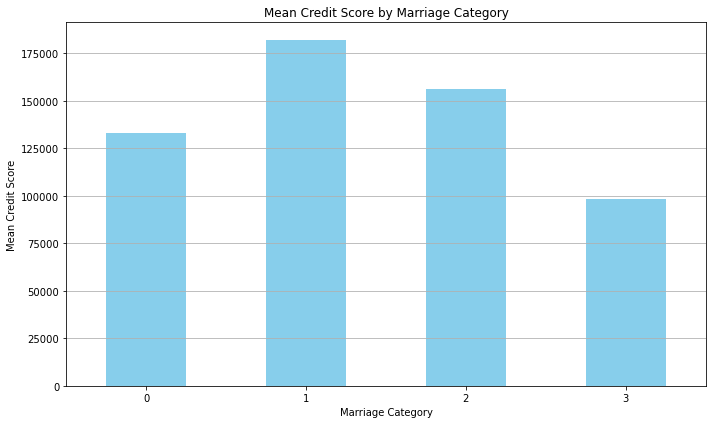

In [42]:

# Group by marriage category and calculate the mean credit score for each group
education_credit_mean = df.groupby('MARRIAGE')['LIMIT_BAL'].mean()

# Plotting
plt.figure(figsize=(10, 6))
education_credit_mean.plot(kind='bar', color='skyblue')
plt.title('Mean Credit Score by Marriage Category')
plt.xlabel('Marriage Category')
plt.ylabel('Mean Credit Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 720x432 with 0 Axes>

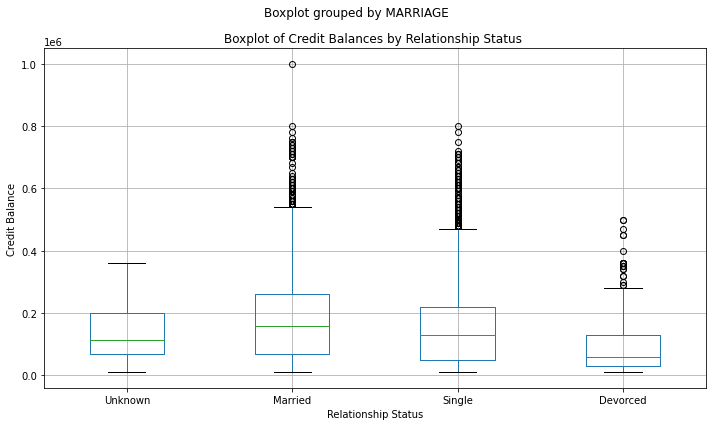

In [43]:
# Plotting boxplots for each education level
mean_credit_by_education = df.groupby('MARRIAGE')['LIMIT_BAL']
plt.figure(figsize=(10, 6))
df.boxplot(column='LIMIT_BAL', by='MARRIAGE', figsize=(10, 6))
plt.title('Boxplot of Credit Balances by Relationship Status ')
plt.xlabel('Relationship Status')
plt.ylabel('Credit Balance')
plt.xticks(range(1, 5), ['Unknown', 'Married', 'Single', 'Devorced'])
plt.tight_layout()
# Show plot
plt.show()


# Observations: 
1. On an average more women are given Credits than Men as they tend to repay it resulting in less defaullters of women than of men. 
1. By the first plots of Age and the LIMIT_BAL we can say that the Clients of age bracket 60-80 tend to get more Credit Balance than other age groups. 
2. Clinets with graduate School diploma have higher chances of getting more credit balance. 
3. As we can conclude by the plots that the married couple tends to have a higher credit balance which was a little predictable as there would be two incomes paying back the money which might lead to the financial organisationslend more money to a married couple than someone who wishes to pay alone. 
4. By all the above analysis we can conclude that the couple who fits in the age bracket of 60 to 80 and who are a Graduate School passouts. 

# PAY_ (Repayment Status)
exploring the numerical variable of Repayment status 

In [44]:
# finding unique values from the PAY_ feature 
unique_values = pd.concat([df['PAY_1'], df['PAY_2'], df['PAY_3'], df['PAY_4'], df['PAY_5'], df['PAY_6']]).unique()
print(unique_values)

[ 2 -1  0 -2  1  3  4  8  7  5  6]


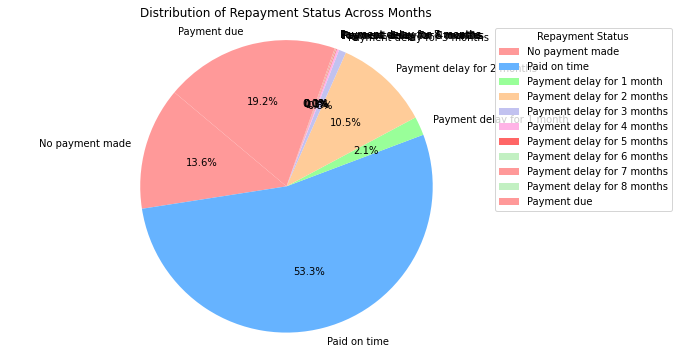

In [45]:

# Create a dictionary to map the numerical values to their corresponding descriptions
status_map = {
    -2: 'No payment made', -1: 'Payment due', 0: 'Paid on time',
    1: 'Payment delay for 1 month', 2: 'Payment delay for 2 months',
    3: 'Payment delay for 3 months', 4: 'Payment delay for 4 months',
    5: 'Payment delay for 5 months', 6: 'Payment delay for 6 months',
    7: 'Payment delay for 7 months', 8: 'Payment delay for 8 months'
}


# Replace numerical values with their corresponding descriptions
df.replace({'PAY_1': status_map, 'PAY_2': status_map, 'PAY_3': status_map,
            'PAY_4': status_map, 'PAY_5': status_map, 'PAY_6': status_map}, inplace=True)

# Count the occurrences of each status across all months
status_counts = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(pd.value_counts)

# Sum the counts across all months to get the total count for each status
total_counts = status_counts.sum(axis=1)

# Plotting
plt.figure(figsize=(10, 6))

# Define colors for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#ff6666','#c2f0c2','#ff9999','#c2f0c2']

# Plot the pie chart with custom colors
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

plt.title('Distribution of Repayment Status Across Months')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend outside of the pie chart
plt.legend(loc="upper right", title="Repayment Status", bbox_to_anchor=(1.2 ,1))

plt.show()

# Observations : 
1. From this pie chart we can see that majority of the Clients are paying the money back on time which is almost 53% of the over all clients of the dataset.

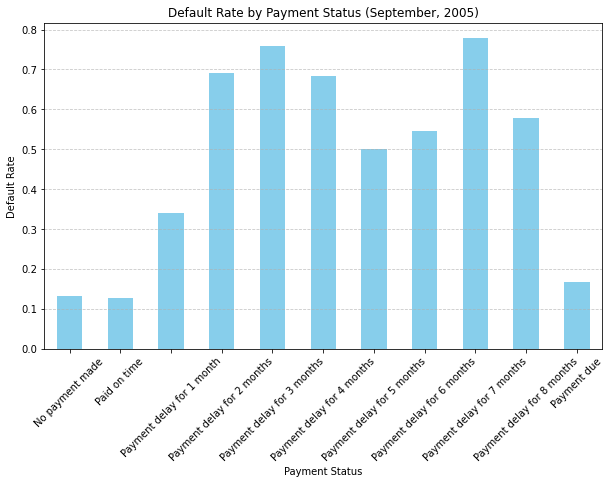

In [46]:
# Calculate default rate by payment status
default_rate_by_payment_status = df.groupby(['PAY_1', 'Default'])['ID'].count().unstack()
default_rate_by_payment_status['Default Rate'] = default_rate_by_payment_status[1] / (default_rate_by_payment_status[0] + default_rate_by_payment_status[1])

# Plotting the default rate by payment status
default_rate_by_payment_status['Default Rate'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Default Rate by Payment Status (September, 2005)')
plt.xlabel('Payment Status')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Observation: 
1.  we can observe that if the payment is delayed for 3 months 7 months the chances of them falling into the Defaulters is the most. 

# BILL_AMT (amount of bills per month)
Exploring the relationship of BILL_AMT with the repayement status to see of there is any pattern which could tell weather the Clinet tends to pay or not depending on the amount of Bill 

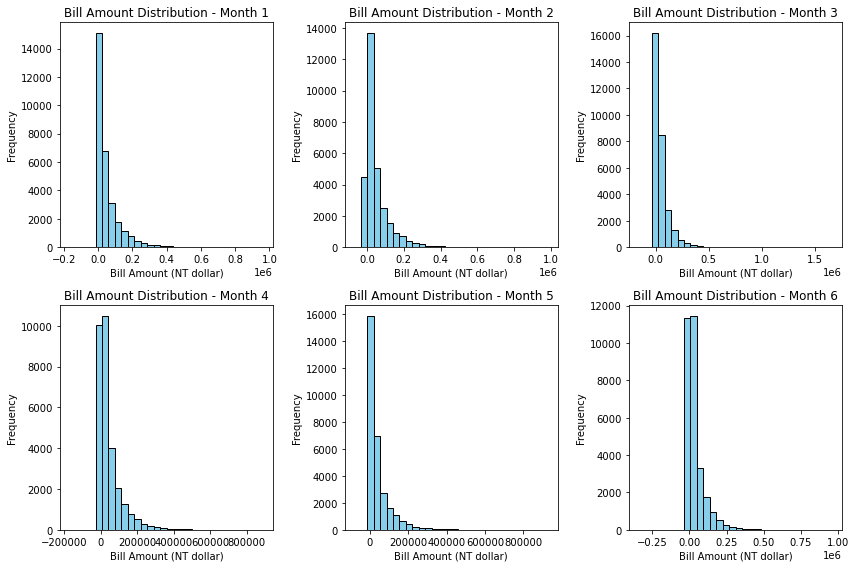

In [47]:
# Plot histograms for each BILL_AMT column
plt.figure(figsize=(12, 8))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.hist(df[f'BILL_AMT{i}'], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Bill Amount Distribution - Month {i}')
    plt.xlabel('Bill Amount (NT dollar)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

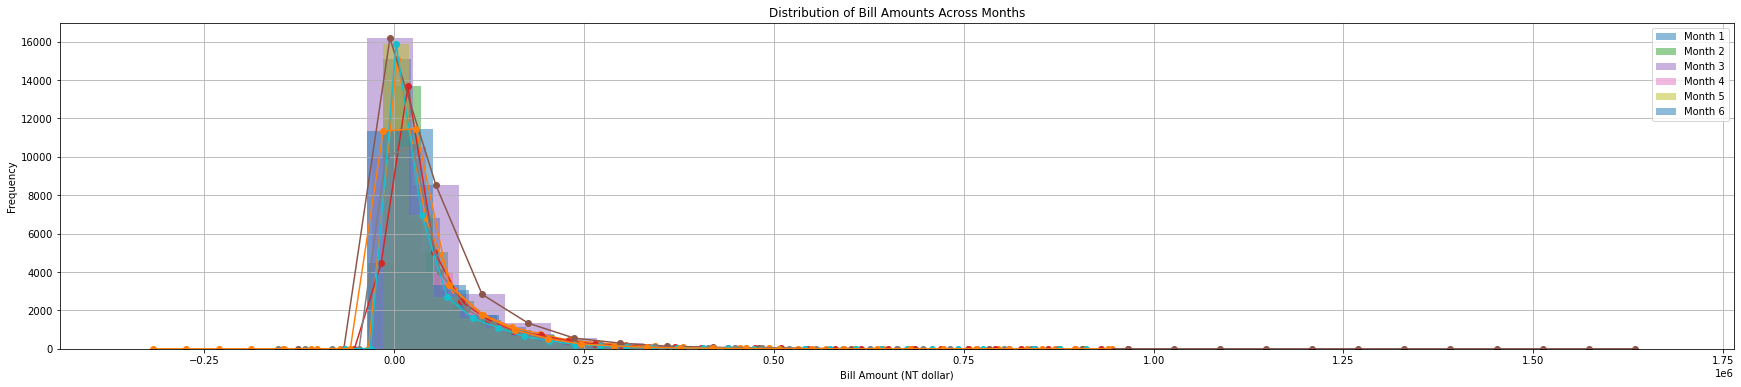

In [48]:
# Initialize a figure and axis
plt.figure(figsize=(30, 6))

# Plot the distribution of bill amounts for each month
for i in range(1, 7):
    # Calculate the histogram for the current month's bill amount
    counts, bins, _ = plt.hist(df[f'BILL_AMT{i}'], bins=30, alpha=0.5, label=f'Month {i}')

    # Plot a line connecting the midpoints of the bins
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, counts, marker='o')

# Set labels and title
plt.xlabel('Bill Amount (NT dollar)')
plt.ylabel('Frequency')
plt.title('Distribution of Bill Amounts Across Months')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Observation:  
1. from this observation we can say that in the third month clients have the highest amount of BILL to pay 

In [49]:
# Select relevant columns for correlation analysis
relevant_columns = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Default']]

# Compute the correlation matrix
correlation_matrix = relevant_columns.corr()

# Display the correlation matrix
print(correlation_matrix)


           BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
BILL_AMT1   1.000000   0.951484   0.892279   0.860272   0.829779   0.802650   
BILL_AMT2   0.951484   1.000000   0.928326   0.892482   0.859778   0.831594   
BILL_AMT3   0.892279   0.928326   1.000000   0.923969   0.883910   0.853320   
BILL_AMT4   0.860272   0.892482   0.923969   1.000000   0.940134   0.900941   
BILL_AMT5   0.829779   0.859778   0.883910   0.940134   1.000000   0.946197   
BILL_AMT6   0.802650   0.831594   0.853320   0.900941   0.946197   1.000000   
Default    -0.019644  -0.014193  -0.014076  -0.010156  -0.006760  -0.005372   

            Default  
BILL_AMT1 -0.019644  
BILL_AMT2 -0.014193  
BILL_AMT3 -0.014076  
BILL_AMT4 -0.010156  
BILL_AMT5 -0.006760  
BILL_AMT6 -0.005372  
Default    1.000000  


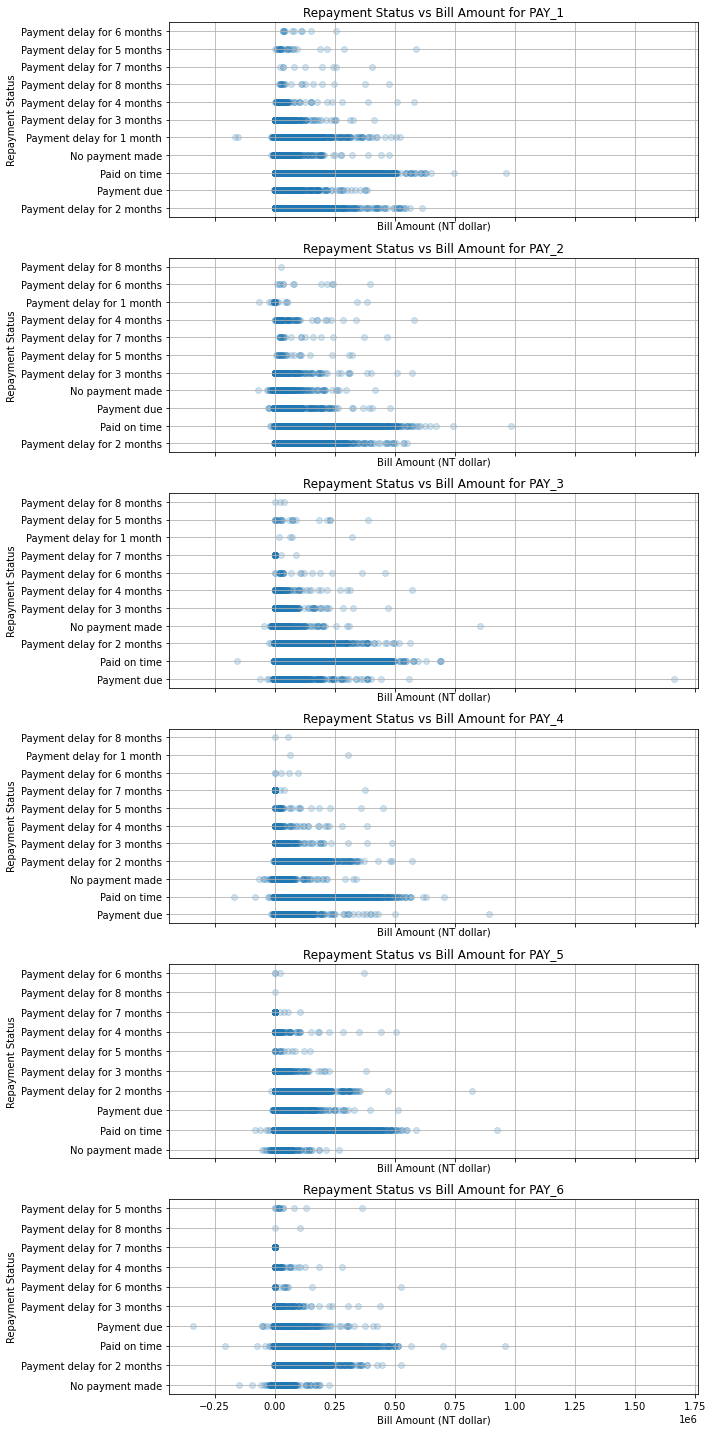

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the relevant columns

# Define the columns of interest
payment_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
bill_amount_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Create subplots for each payment status
fig, axs = plt.subplots(len(payment_columns), figsize=(10, 20), sharex=True)

# Plot the relationship between bill amounts and repayment status for each month
for i, (pay_col, bill_col) in enumerate(zip(payment_columns, bill_amount_columns)):
    axs[i].scatter(df[bill_col], df[pay_col], alpha=0.2)
    axs[i].set_xlabel('Bill Amount (NT dollar)')
    axs[i].set_ylabel('Repayment Status')
    axs[i].set_title(f'Repayment Status vs Bill Amount for {pay_col}')
    axs[i].grid(True)

plt.tight_layout()
plt.show()


# Observation :  
1. By this graph we can tell that irrespective of the Bill amount Clients tend to repay the bills on time in majority of the cases 

# Observations: 
1. The age bracket of 60 to 80 get the highest bill amount on an average. 
2. On an Average single clients tend to have high bill amount everymonth. 
3. This is an intresting observation where the education if a client is unknown people tend to have high bills every month. 

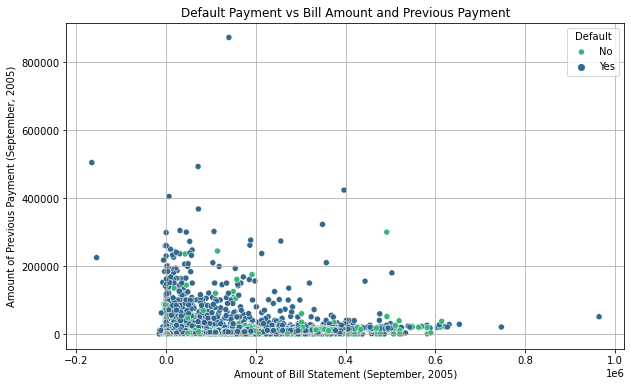

In [51]:
# Plot a scatter plot of defaulters using BILL_AMT1 and PAY_AMT1 features

plt.figure(figsize=(10, 6))
sns.scatterplot(x='BILL_AMT1', y='PAY_AMT1', hue='Default', data=df, palette='viridis')
plt.xlabel('Amount of Bill Statement (September, 2005)')
plt.ylabel('Amount of Previous Payment (September, 2005)')
plt.title('Default Payment vs Bill Amount and Previous Payment')
plt.grid(True)
plt.legend(title='Default', loc='upper right', labels=['No', 'Yes'])
plt.show()


In [52]:
# List of bill amount columns
bill_amount_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Find the minimum and maximum values across all BILL_AMT columns
min_bill_amt = df[bill_amount_columns].min().min()
max_bill_amt = df[bill_amount_columns].max().max()

print("Minimum BILL_AMT:", min_bill_amt)
print("Maximum BILL_AMT:", max_bill_amt)


Minimum BILL_AMT: -339603.0
Maximum BILL_AMT: 1664089.0


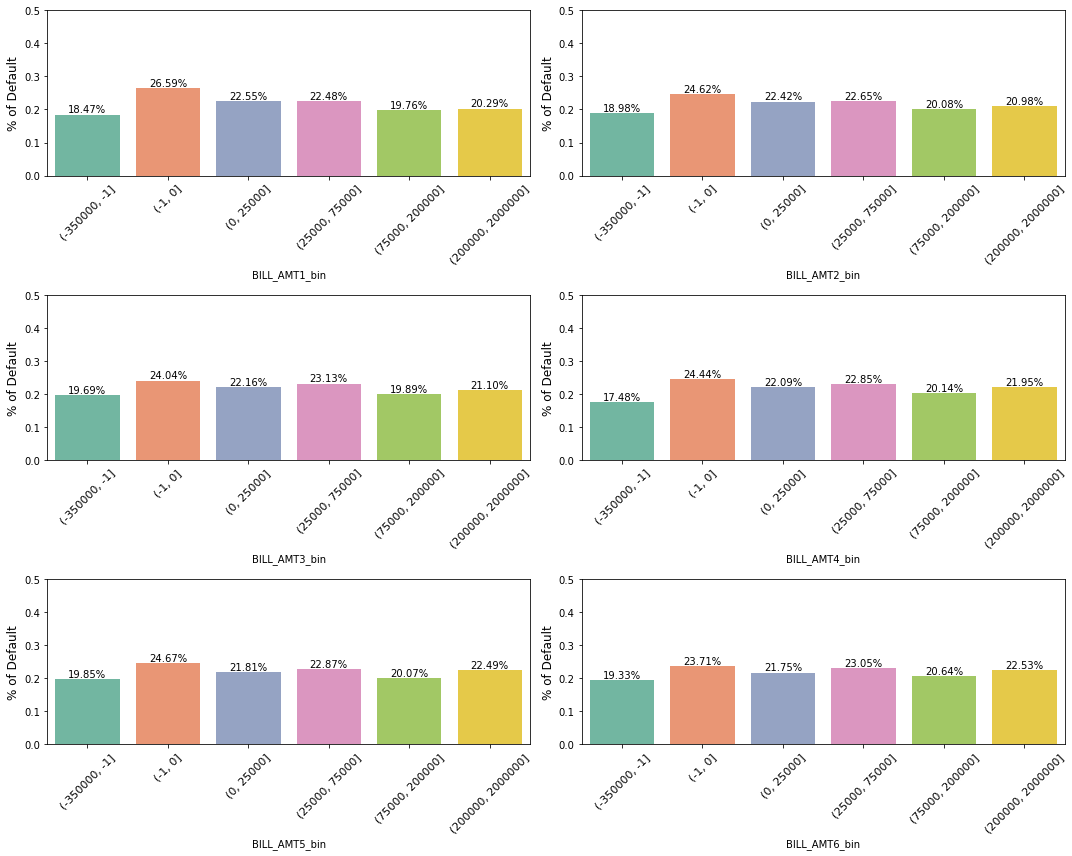

In [53]:
# Create bin columns for each bill amount column
for i, col in enumerate(bill_amount_columns, start=1):
    df[f'BILL_AMT{i}_bin'] = pd.cut(df[col], bins=[-350000, -1, 0, 25000, 75000, 200000, 2000000])

# List of bill amount bin columns
bill_amtx_bins = [f'BILL_AMT{i}_bin' for i in range(1, 7)]

# Plotting
plt.figure(figsize=(15, 12))

for i, col in enumerate(bill_amtx_bins, start=1):
    plt.subplot(3, 2, i)
    ax = sns.barplot(x=col, y="Default", data=df, palette='Set2', ci=None)
    plt.ylabel("% of Default", fontsize=12)
    plt.ylim(0, 0.5)
    plt.xticks(rotation=45, fontsize=11)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f%%" % (p.get_height() * 100), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

In [54]:
# Assuming df is your DataFrame containing the relevant columns
# List of PAY_AMT columns
pay_amount_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Find the minimum and maximum values across all PAY_AMT columns
min_pay_amt = df[pay_amount_columns].min().min()
max_pay_amt = df[pay_amount_columns].max().max()

print("Minimum PAY_AMT:", min_pay_amt)
print("Maximum PAY_AMT:", max_pay_amt)

Minimum PAY_AMT: 0.0
Maximum PAY_AMT: 1684259.0


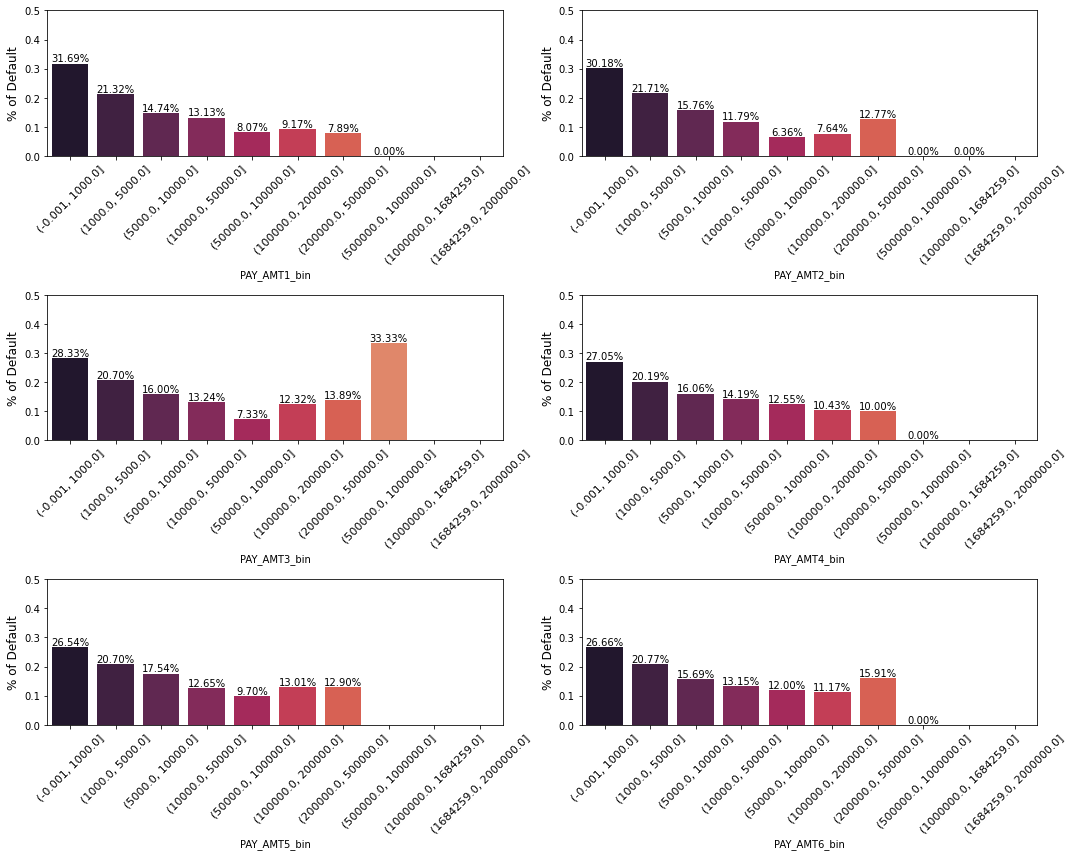

In [55]:
# Define the bin edges for PAY_AMT
bin_edges = [0, 1000, 5000, 10000, 50000, 100000, 200000, 500000, 1000000, 2000000, df[pay_amount_columns].max().max()]

# Sort the bin edges in ascending order
bin_edges.sort()

# Create bin columns for each PAY_AMT column
for i, col in enumerate(pay_amount_columns, start=1):
    df[f'PAY_AMT{i}_bin'] = pd.cut(df[col], bins=bin_edges, include_lowest=True)  # Ensure to include the lowest value in the bin

# List of PAY_AMT bin columns
pay_amtx_bins = [f'PAY_AMT{i}_bin' for i in range(1, 7)]

# Plotting
plt.figure(figsize=(15, 12))

for i, col in enumerate(pay_amtx_bins, start=1):
    plt.subplot(3, 2, i)
    ax = sns.barplot(x=col, y="Default", data=df, palette='rocket', ci=None)
    plt.ylabel("% of Default", fontsize=12)
    plt.ylim(0, 0.5)
    plt.xticks(rotation=45, fontsize=11)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f%%" % (p.get_height() * 100), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

# Observations: 
In this dataset, the observed trends are consistent with established patterns. Notably, individuals who made no payments in previous months exhibit a higher incidence of default, whereas those who made payments exceeding 25,000 NT dollars demonstrate a notably lower default rate. These findings align with expected behaviors and contribute to a comprehensive understanding of the dataset's dynamics.

# MODEL Selection and basic feature enginnering to remap and calibrate the feature again to fit the Model  

In [65]:
# Printing out column names to takle a look over the features use during the EDA 
column_names = df.columns.tolist()
print(column_names)

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default', 'BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin', 'PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']


In [66]:
# dropping the catogerial columns used during the EDA
df.drop(columns=['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin', 'PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin'], inplace=True)

In [58]:
# Reverse mapping dictionary to map descriptions back to numerical values
reverse_status_map = {v: k for k, v in status_map.items()}

# Replace the strings with their corresponding numerical values
df.replace({'PAY_1': reverse_status_map, 'PAY_2': reverse_status_map, 'PAY_3': reverse_status_map,
            'PAY_4': reverse_status_map, 'PAY_5': reverse_status_map, 'PAY_6': reverse_status_map}, inplace=True)


In [67]:
# checking the dataframe 
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Random Forest Classifier

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame containing the data
# Define features and target variable
X = df.drop(columns=['Default', 'ID'])  # Features
y = df['Default']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and classifier
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Random Forest :", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Random Forest : 0.8146666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.36      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000



# K-Nearest Neighbors (KNN)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Define features and target variable
X = df.drop(columns=['Default', 'ID'])  # Features
y = df['Default']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
knn_pred = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_classification_report = classification_report(y_test, knn_pred)

print("K-Nearest Neighbors (KNN):")
print("Accuracy:", knn_accuracy)
print("Classification Report:")
print(knn_classification_report)

K-Nearest Neighbors (KNN):
Accuracy: 0.7561666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      4687
           1       0.38      0.19      0.25      1313

    accuracy                           0.76      6000
   macro avg       0.59      0.55      0.55      6000
weighted avg       0.71      0.76      0.72      6000



# Logistic Regression 

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Define features and target variable
X = df.drop(columns=['Default', 'ID'])  # Features
y = df['Default']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict on the test set
log_reg_pred = log_reg_model.predict(X_test)

# Evaluate the model
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_classification_report = classification_report(y_test, log_reg_pred)

print("Logistic Regression:")
print("Accuracy:", log_reg_accuracy)
print("Classification Report:")
print(log_reg_classification_report)


Logistic Regression:
Accuracy: 0.7811666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

# Support Vector Machine (SVM)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# Define features and target variable
X = df.drop(columns=['Default', 'ID'])  # Features
y = df['Default']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVC model
svc_model = SVC(random_state=42)

# Train the model
svc_model.fit(X_train, y_train)

# Predict on the test set
svc_pred = svc_model.predict(X_test)

# Evaluate the model
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_classification_report = classification_report(y_test, svc_pred)

print("Support Vector Machine (SVM):")
print("Accuracy:", svc_accuracy)
print("Classification Report:")
print(svc_classification_report)


Support Vector Machine (SVM):
Accuracy: 0.7811666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting Classifier

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Define features and target variable
X = df.drop(columns=['Default', 'ID'])  # Features
y = df['Default']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_pred = gb_model.predict(X_test)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_classification_report = classification_report(y_test, gb_pred)

print("Gradient Boosting Classifier:")
print("Accuracy:", gb_accuracy)
print("Classification Report:")
print(gb_classification_report)


Gradient Boosting Classifier:
Accuracy: 0.8205
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



# Support Vector Classifier (SVC)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# Define features and target variable
X = df.drop(columns=['Default', 'ID'])  # Features
y = df['Default']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVC model
svc_model = SVC(random_state=42)

# Train the model
svc_model.fit(X_train, y_train)

# Predict on the test set
svc_pred = svc_model.predict(X_test)

# Evaluate the model
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_classification_report = classification_report(y_test, svc_pred)

print("Support Vector Classifier (SVC):")
print("Accuracy:", svc_accuracy)
print("Classification Report:")
print(svc_classification_report)

Support Vector Classifier (SVC):
Accuracy: 0.7811666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Observation : 
We selected the Gradient Boosting Classifier as the best model due to its superior accuracy compared to other models evaluated in predicting defaulters from the credit analysis dataset. With an accuracy of 0.8205, the Gradient Boosting Classifier demonstrates a strong capability to correctly classify individuals at risk of default. Moreover, while accuracy is an essential metric, we also considered factors such as precision, recall, and F1-score to ensure a balanced performance in correctly identifying defaulters while minimizing false positives. Despite its potential lack of interpretability compared to simpler models like logistic regression, the Gradient Boosting Classifier offers robust predictive performance across different datasets and maintains stability over time. Additionally, its computational complexity, although higher than some models, is justified by its superior predictive power, making it a suitable choice for credit analysis tasks where accuracy and reliability are paramount. 